In [1]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Problem 1 (5 points)

This problem will explore ***Iteratively Reweighted Least Squares IRLS*** in the context of a ***log linear model*** with a ***Poisson*** distribution. 

For a ***log-linear model*** $\lambda_i = E[y_i|x_i, \beta] = Var[y_i|x_i, \beta] = \exp(x^T_i\beta)$ with a ***Poisson*** distribution

$$f\left(y_i|\lambda_i= \exp(x^T_i\beta)\right) = \frac{\exp(-\lambda_i)\lambda^y_i}{y_i!} = \frac{\exp(-\exp(x_i^T\beta))\exp(x_i^T\beta)^{y_i}}{y_i!}$$

For this ***generalized linear model***
- the ***link function*** $\phi$ is $\phi(\lambda_i) = \ln \lambda_i = x_i^T\beta$ so $\lambda_i = E[y_i|x_i, \beta] = Var[y_i|x_i, \beta] = \exp(x_i^T\beta)$
    - and for the $\phi(\cdot) = \ln(\cdot)$ ***link function***, $\phi'(\cdot) = (\cdot)^{-1}$ 
- the ***log likelihood*** ignoring the $(y_i!)$ ***normalizing constant*** is $$\ln f(y_i|\lambda_i) = -\lambda_i + y_i\ln\lambda_i = -\exp(x_i^T\beta) + y_i (x_i^T\beta)$$ 
- the ***score function*** is $$S(\beta) = \sum_{i=1}^n \nabla_\beta \ln f(y_i|\lambda_i) = \sum_{i=1}^n  -\exp(x_i^T\beta)x_i + y_i x_i = \sum_{i=1}^n (y_i-\lambda_i)x_i = X^T(y-\lambda)$$ 
- and the ***expected Fisher Information*** is 

  \begin{align*}
  \mathcal I(\beta) = -E\left[\sum_{i=1}^n H \ln f(y_i|\lambda_i)\right] & = {} -E\left[\sum_{i=1}^n J \nabla_\beta \ln f(y_i|\lambda_i)\right] \\
  & = {} E\left[\sum_{i=1}^n (\nabla_\beta \ln f(y_i|\lambda_i))(\nabla_\beta \ln f(y_i|\lambda_i))^T\right] \\
  & = {} \sum_{i=1}^n E\left[(y_i-\lambda_i)^2\right]x_ix_i^T = \sum_{i=1}^n  \lambda_ix_ix_i^T  = X^TD(\lambda)X \quad D_{ii}(\lambda)=\lambda_i \quad D_{\underset{\neq}{ij}}(\lambda)=0
  \end{align*}


***Newton's method*** and ***Fisher scoring*** for this specification are thus, respectively

\begin{align*}
\beta^{(t+1)} & = {} \beta^{(t)} - [H f(y|\lambda^{(t)})]^{-1} S(\beta^{(t)})\\
\beta^{(t+1)} & = {} \beta^{(t)} + \mathcal I(\beta)^{-1} S(\beta^{(t)})\\
& = {} \beta^{(t)} + (X^TD(\lambda^{(t)})X)^{-1} S(\beta^{(t)})\\
& = {} (X^TD(\lambda^{(t)})X)^{-1} \left(X^TD(\lambda^{(t)})X\beta^{(t)} + S(\beta^{(t)}) \right)\\
& = {} (X^TD(\lambda^{(t)})X)^{-1} \Bigg(X^TD(\lambda^{(t)})X\beta^{(t)} + X^TD(\lambda^{(t)})[D(\lambda^{(t)})]^{-1} \left(y-\lambda^{(t)}\right) \Bigg)\\
& = {} (X^TD(\lambda^{(t)})X)^{-1} X^TD(\lambda^{(t)}) \Bigg(X\beta^{(t)} + \overbrace{\left[\frac{y-\lambda^{(t)}}{\lambda^{(t)}} \right]}^{\text{element-wise}} \Bigg)\\
\end{align*}

which is the solution of the ***weighted least squares regression*** of $\tilde y^{(t)} = \left(X\beta^{(t)} + \frac{y-\lambda^{(t)}}{\lambda^{(t)}}\right)$ against $X$ with ***weights*** $D(\lambda^{(t)})$.

## Problem 1 Questions 0-1 (1 point)

0. (0.5 points) Which of the following are equal to $D(\lambda^{(t)})$?

    1. $\hat y^{(t)}$ 
    2. $E[y | x_i,\lambda^{(k)}]$
    3. $Var[y | x_i,\lambda^{(k)}]$
    4. All of the above  
    

1. (0.5 points) Which of the following are equal to $\tilde y^{(t)}$? 

    1. $\hat y^{(t)} + \frac{y - E[y | x_i,\lambda^{(t)}]}{\hat y^{(t)}}$ 
    2. $\hat y^{(t)} + \frac{y - E[y | x_i,\lambda^{(t)}]}{SD[y | x_i,\lambda^{(t)}]}$ 
    3. $\ln \hat y^{(t)} + \frac{y - \hat  y^{(t)}}{Var[y | x_i,\lambda^{(t)}]}$
    4. $\ln \hat y^{(t)} + \frac{y - E[y | x_i,\lambda^{(t)}]}{SD[y | x_i,\lambda^{(t)}]}$ 
    
    
***Hint:*** The $\hat y^{(t)}$ is the prediction of $y$ at time $t$. What is that?


In [ ]:
# 0.5 points each [format: `str` either "A" or "B" or "C" or "D" based on the choices above]
p1q0 = #<"A"|"B"|"C"|"D"> 
p1q1 = #<"A"|"B"|"C"|"D"> 
# Uncomment the above and keep each only either "A" or "B" or "C" or "D"

# This cell will produce a runtime error until the `p1q0` and `p1q1` variables are assigned values

## Problem 0 Question 2-3 (1 point)

2. (0.5 points) For the design matrix `X` below, and $\beta_j = \frac{10-j}{10}$ with intercept $\beta_0$, produce $E[y|X,\beta]$ for the ***Poisson GLM*** specified above.

    ```python
np.random.seed(410)
n,p=100,10
X = stats.norm.rvs(size=(n,p))
X[:,0]=1
X
    ```

2. (0.5 points) Now simulate $y$ for the ***Poisson GLM*** specified above with seed `np.random.seed(411)`. That is, call `np.random.seed(411)` immediately before sampling $y$.


In [ ]:
# Cell for scratch work

# You are welcome to add as many new cells into this notebook as you would like.
# Just do not leave in a state that will produce a runtime errors when notebook cells are run sequentially.

# Any cells included for scratch work that are no longer needed may be deleted so long as 
# - all the required functions are still defined and available when called
# - no cells requiring variable assignments are deleted.

# None of this will not cause problems with `cell ids` assuming your versioning supports `cell ids`
# (as UofT JupyterHub, UofT JupyterLab, an Google Colab will).


In [ ]:
# Cell for scratch work


In [ ]:
# 0.5 points each [format: `np.array` with shape (100, 1)]
p1q2 = # E[y|X,beta]
p1q3 = # y sampled based on E[y|X,beta] with seed np.random.seed(411)
# Assign the appropriate numpy expressions to `p1q2` and `p1q3`

# This cell will produce a runtime error until the `p1q2` and `p1q3` variables are assigned values

## Problem 1 Question 4 (1 point)

4. Define the function `IRLS(X, y, beta_0, m, v, k)` where the default arguments for parameters `m` and `v` are functions returning `E[y|X,beta_t]` and `Var[y|X,beta_t]`, respectively:

    - `m = lambda X,beta_t: #E[y|X,beta_t]`
    - `v = lambda X,beta_t: #Var[y|X,beta_t]`

  and `IRLS` performs `k` ***IRLS*** updates on `beta_0` using `sm.regression.linear_model.WLS`.
  
Your function will be tested directly for various values of `k` based on `X` and `y` generated above using the initial value `beta_0 = np.zeros((p,1))`.

In [ ]:
def IRLS(X, y, beta_0, m = lambda X,beta_t: pass, v = lambda X,beta_t: pass, k=1):
    '''
    X (np.array) with shape (n,p)
    y (np.array) with shape (n,1)
    beta_0 (np.array) with shape (p,1)
    m (function) with paramters (np.arrays) X (n,p) and beta_t (p,1) which returns E[y|X,beta_t]
    v (function) with paramters (np.arrays) X (n,p) and beta_t (p,1) which returns Var[y|X,beta_t]
    k (int) number of IRLS steps to perform
    
    returns beta_k (np.array) with shape (p,1) which is the kth IRLS update on beta_0    
    '''
    # Pass the correct functions to m and v 
    
    beta_t = beta_0.copy()
    # <complete>
    
    return beta_t

## Problem 1 Question 5-6 (0.5 points)

5. (0.25 points) What is the default function assigned for the `m` parameter of the `IRLS` function above?

6. (0.25 points) What is the default function assigned for the `v` parameter of the `IRLS` function above?

In [42]:
# 0.25 points each [format: functions conforming to the IRLS parameters]

#m = lambda X,beta_t: pass
p1q5 = #m
#v = lambda X,beta_t: pass
p1q6 = #v
# uncomment four lines above once m and v and correctly defined

# This cell will produce a runtime error until the `p1q5` and `p1q6` variables are assigned values

## Problem 1 Question 7-8 (1 point)

These questions consider the ***IRLS*** algorithm from the more general perspective of ***pseudo (log) likelihoods***.

The ***score*** function $S$ and the ***expected Fisher information*** $\mathcal I$ for a ***pseudo (log) likelihood*** $Q$ (in place of an explicit ***log likelihood***) of a ***generalized linear model*** are

\begin{align*}
S_i(\beta) = \nabla_\beta Q(y_i|\lambda_i=\phi^{-1}(x_i^T\beta)) & = {} \frac{\partial}{\lambda_i}Q(y_i|\lambda_i) \nabla_\beta \lambda_i \quad \text{(derivative chain rule)} \\
& = {} \frac{\partial}{\lambda_i}Q(y_i|\lambda_i) \nabla_\beta \phi^{-1}(x_i^T\beta)\\
& = {} \frac{\partial}{\lambda_i}Q(y_i|\lambda_i) [\phi'(\phi^{-1}(x_i^T\beta))]^{-1}x_i \quad \text{(derivative of inverse rule)}\\
& \equiv {} \frac{y_i-\lambda_i}{Var(\lambda_i)} [\phi'(\lambda_i)]^{-1}x_i \quad \text{(pseudo log likelihood specification)}\\\\
S(\beta) & = {} \sum_{i=1}^n \frac{y_i-\lambda_i}{Var(\lambda_i)} [\phi'(\lambda_i)]^{-1}x_i = X^T\underbrace{\left[\frac{y-\lambda}{Var(\lambda)\odot \phi'(\lambda)}\right]}_{\text{element-wise}}\\
\mathcal I_i(\beta) = - E[H Q(y_i|\lambda_i) ] = - E[J \nabla_\beta Q(y_i|\lambda_i) ] & = {} E[ \nabla_\beta Q(y_i|\lambda_i) \nabla_\beta Q(y_i|\lambda_i)^T ] = E[ S(\beta) S(\beta)^T ] \\
& = {} \frac{E[(y_i-\lambda_i)^2]x_ix_i^T}{Var(\lambda_i)^2[\phi'(\lambda_i)]^{2}} = \frac{x_ix_i^T}{Var(\lambda_i)[\phi'(\lambda_i)]^{2}} \\
\mathcal I(\beta) & = {} \sum_{i=1}^n \frac{x_ix_i^T}{Var(\lambda_i)[\phi'(\lambda_i)]^{2}} = X^TD(\lambda)X \quad D_{ii}(\lambda)=\frac{1}{Var(\lambda_i)[\phi'(\lambda_i)]^{2}} \quad D_{\underset{\neq}{ij}}(\lambda)=0
\end{align*}

***Newton's method*** and ***Fisher scoring*** are thus respectively

\begin{align*}
\beta^{(t+1)} & = {} \beta^{(t)} - [H Q(y|\lambda^{(t)})]^{-1} S(\beta^{(t)})\\
\beta^{(t+1)} & = {} \beta^{(t)} + \mathcal I(\beta)^{-1} S(\beta^{(t)})\\
& = {} \beta^{(t)} + (X^TD(\lambda^{(t)})X)^{-1} S(\beta^{(t)})\\
& = {} (X^TD(\lambda^{(t)})X)^{-1} \left(X^TD(\lambda^{(t)})X\beta^{(t)} + S(\beta^{(t)}) \right)\\
& = {} (X^TD(\lambda^{(t)})X)^{-1} \Bigg(X^TD(\lambda^{(t)})X\beta^{(t)} + X^TD(\lambda^{(t)}) \overbrace{\left[\phi'(\lambda^{(t)}) \odot (y-\lambda^{(t)})\right]}^{\text{element-wise}} \Bigg)\\
& = {} (X^TD(\lambda^{(t)})X)^{-1} X^TD(\lambda^{(t)}) \left(X\beta^{(t)} + \left[\phi'(\lambda^{(t)}) \odot (y-\lambda^{(t)}) \right] \right)
\end{align*}

7. (0.5 points) Recalling that $\phi'(\cdot) = (\cdot)^{-1}$ for ***link function*** $\phi(\cdot) = \ln(\cdot)$, use the `IRLS` function defined above to perform ***Fisher scoring*** for `X`, `y`,  initial value `beta_0 = np.zeros((p,1))`, and `k=1000` for the ***quasi (log) likelihood*** based on the ***log linear model*** $\lambda_i = \exp(x_i^T\beta)$ with $Var(\lambda_i) = \exp(x_i^T\beta)$.
    

8. (0.5 points) ***Logistic regression*** with a ***Bernoulli*** distribution

    $$f\left(y_i\,\Bigg|\,\lambda_i= \frac{1}{1+\exp(-x^T_i\beta)}\right) = \lambda_i^{y_i} (1-\lambda_i)^{1-y_i} = \left(\frac{1}{1+\exp(-x^T_i\beta)} \right)^{y_i} \left(1-\frac{1}{1+\exp(-x^T_i\beta)} \right)^{1-y_i} $$

    has 

    - $\lambda_i = E[y_i|x_i,\beta] = \frac{1}{1+\exp(-x^T_i\beta)}$ and $Var[y_i|x_i,\beta] = Var(\lambda_i) = \left(1-\frac{1}{1+\exp(-x^T_i\beta)}\right)\left(\frac{1}{1+\exp(-x^T_i\beta)}\right)$

    - and ***link function*** $\phi(\lambda_i) = \ln\left(\frac{\lambda_i}{1-\lambda_i}\right)$ so that $\phi'(\lambda_i) = \frac{1}{\lambda_i} + \frac{1}{1-\lambda_i} = \frac{1}{\lambda_i(1-\lambda_i)}$.

    Use the `IRLS` function defined above to perform ***Fisher scoring*** for `X`, `int(y>1)`, initial value `beta_0 = np.zeros((p,1))`, and `k=1000` for the ***quasi (log) likelihood*** based on $\lambda_i = \frac{1}{1+\exp(-x^T_i\beta)}$ with $Var(\lambda_i) = \lambda_i(1-\lambda_i)$.

***Hint:*** these problem will be most easy to solve if you first simplify the element-wise $D(\lambda^{(t)})$ and $\phi'(\lambda^{(t)}) \odot (y-\lambda^{(t)})$ into simpler forms.
   

In [65]:
# 0.5 points each [format: `np.array` with shape (p, 1)]
p1q7 = # IRLS(X, y, beta_0, m=..., v=..., k=1000)
p1q8 = # IRLS(X, (y>1).astype(int), beta_0, m=..., v=..., k=1000)
# Assign the appropriate functions for `m` and `v` in order to correctly assign `p1q7` and `p1q8`

# This cell will produce a runtime error until the `p1q7` and `p1q8` variables are assigned values

## Problem 1 Question 9 (0.5 points)

9. What is the estimated standard error of the coefficients for question 7?

***Hint:*** what is an estimate of the covariance matrix of interest? 

In [ ]:
# Cell for scratch work

# You are welcome to add as many new cells into this notebook as you would like.
# Just do not leave in a state that will produce a runtime errors when notebook cells are run sequentially.

# Any cells included for scratch work that are no longer needed may be deleted so long as 
# - all the required functions are still defined and available when called
# - no cells requiring variable assignments are deleted.

# None of this will not cause problems with `cell ids` assuming your versioning supports `cell ids`
# (as UofT JupyterHub, UofT JupyterLab, an Google Colab will).


In [125]:
# Cell for scratch work


In [ ]:
# 0.5 points [format: `np.array` with shape (p, 1)]
p1q9 = # standard error of beta-hat estimated in problem

# This cell will produce a runtime error until the `p1q9` variable has been assigned a value

# Problem 2 (5 points)

Complete ***Problem 2*** in the `STA410_CC2_PyMC.ipynb` file.
- You will use `X` and `y` generated in ***Problem 1***, so recreate that data in the `STA410_CC2_PyMC.ipynb` file.

# Problem 2 (5 points)

0. (2 points) Provide a ***Hamiltonian Monte Carlo (HMC)*** based ***Bayesian posterior analysis*** for the ***Poisson regression*** of `y` on `X` for the data generated in ***Problem 1***.

    - Provide a visual posterior analysis of your HMC results by graphically displaying the posterior distribution samples of your model parameters.
    - Plot the log of the ***posterior predicted value*** of each `y` versus the log of the observed `y`.
    
  ***Hint***: make sure the shapes of your multiplications are correct. `PyMC` requires object shapes to specified correctly relative to the operations they are being used for.
    
    
1. (1 point) Provide a figure and a summary table justifying an assessment of agreement between MCMC chains which suggests convergence of the MCMC algorithm, as well as a figure assessing the general performance of the HMC algorithm overall without reference to specific model coefficients and parameters.


2. (0.5 points) Compute `ess_bulk` and `ess_tail` for the model parameters and interpret these values.


3. (1 points) Provide a ***Bayesian posterior analysis*** for a ***logistic regression*** of `(y>1).asype(int)` on `X` for the data generated in ***Problem 1***.

    - Provide the analogous visual posterior analyses of your HMC results as you did for the ***Poisson regression*** above.


4. (0.5 points) Summarize the similarity and differences in the posterior diagnostics for the ***logistic regression*** versus the ***Poisson regression***.

In [ ]:
# p2q0: your code and results will be evaluated visually

# Recreate `X` and `y` from Problem 1


In [6]:
import numpy as np
from scipy import stats

np.random.seed(410)
n,p=100,10
X = stats.norm.rvs(size=(n,p))
X[:,0]=1
X
beta = np.linspace(10,1,10)/10
beta = beta[:,np.newaxis]
np.exp(X@beta)
p1q2 = np.exp(X@beta)
np.random.seed(411)
p1q3 = stats.poisson(mu=p1q2).rvs(p1q2.shape)
y = p1q3
np.random.seed(411)
assert np.allclose(p1q3, stats.poisson(mu=p1q2).rvs(p1q2.shape))

In [ ]:
# p2q0 (1 point): your code and figures/results will be evaluated visually

# Specify the Poisson regression of `y` on `X`
# and run a PyMC HMC algorithm to produce MCMC samples
# from the posterior distributions of the parameters of this model


In [7]:
import pymc as pm
from pymc import Poisson, Normal, Model, Deterministic
from pymc.math import exp

with Model() as model: 
    
    betas = Normal("betas", mu=0, sigma=1, shape=(10,1))
    means = Deterministic('lambdas', exp(X@betas))
    likelihood = Poisson('likelihood', means, observed=y)
    
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 23 seconds.


In [ ]:
# p2q0 (0.5 points): your code and figures/results will be evaluated visually

# Provide a visual posterior analysis of your HMC results
# by graphically displaying the posterior distribution samples of your model parameters


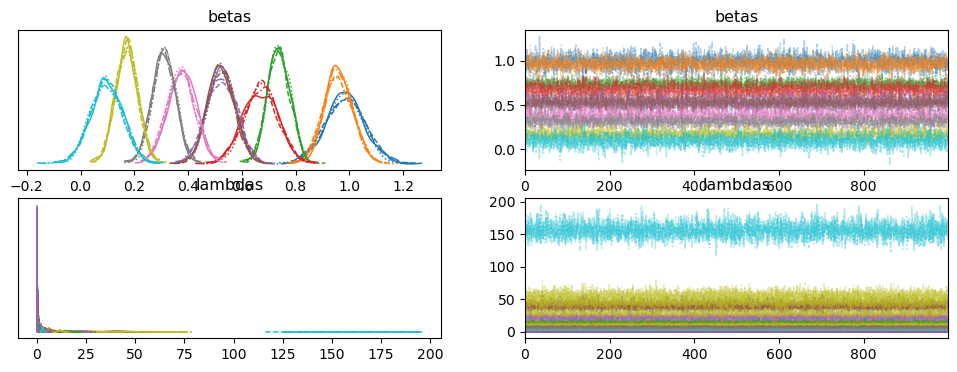

In [8]:
import arviz as az
# either this (with or without the lambdas)
az.plot_trace(idata, show=True);

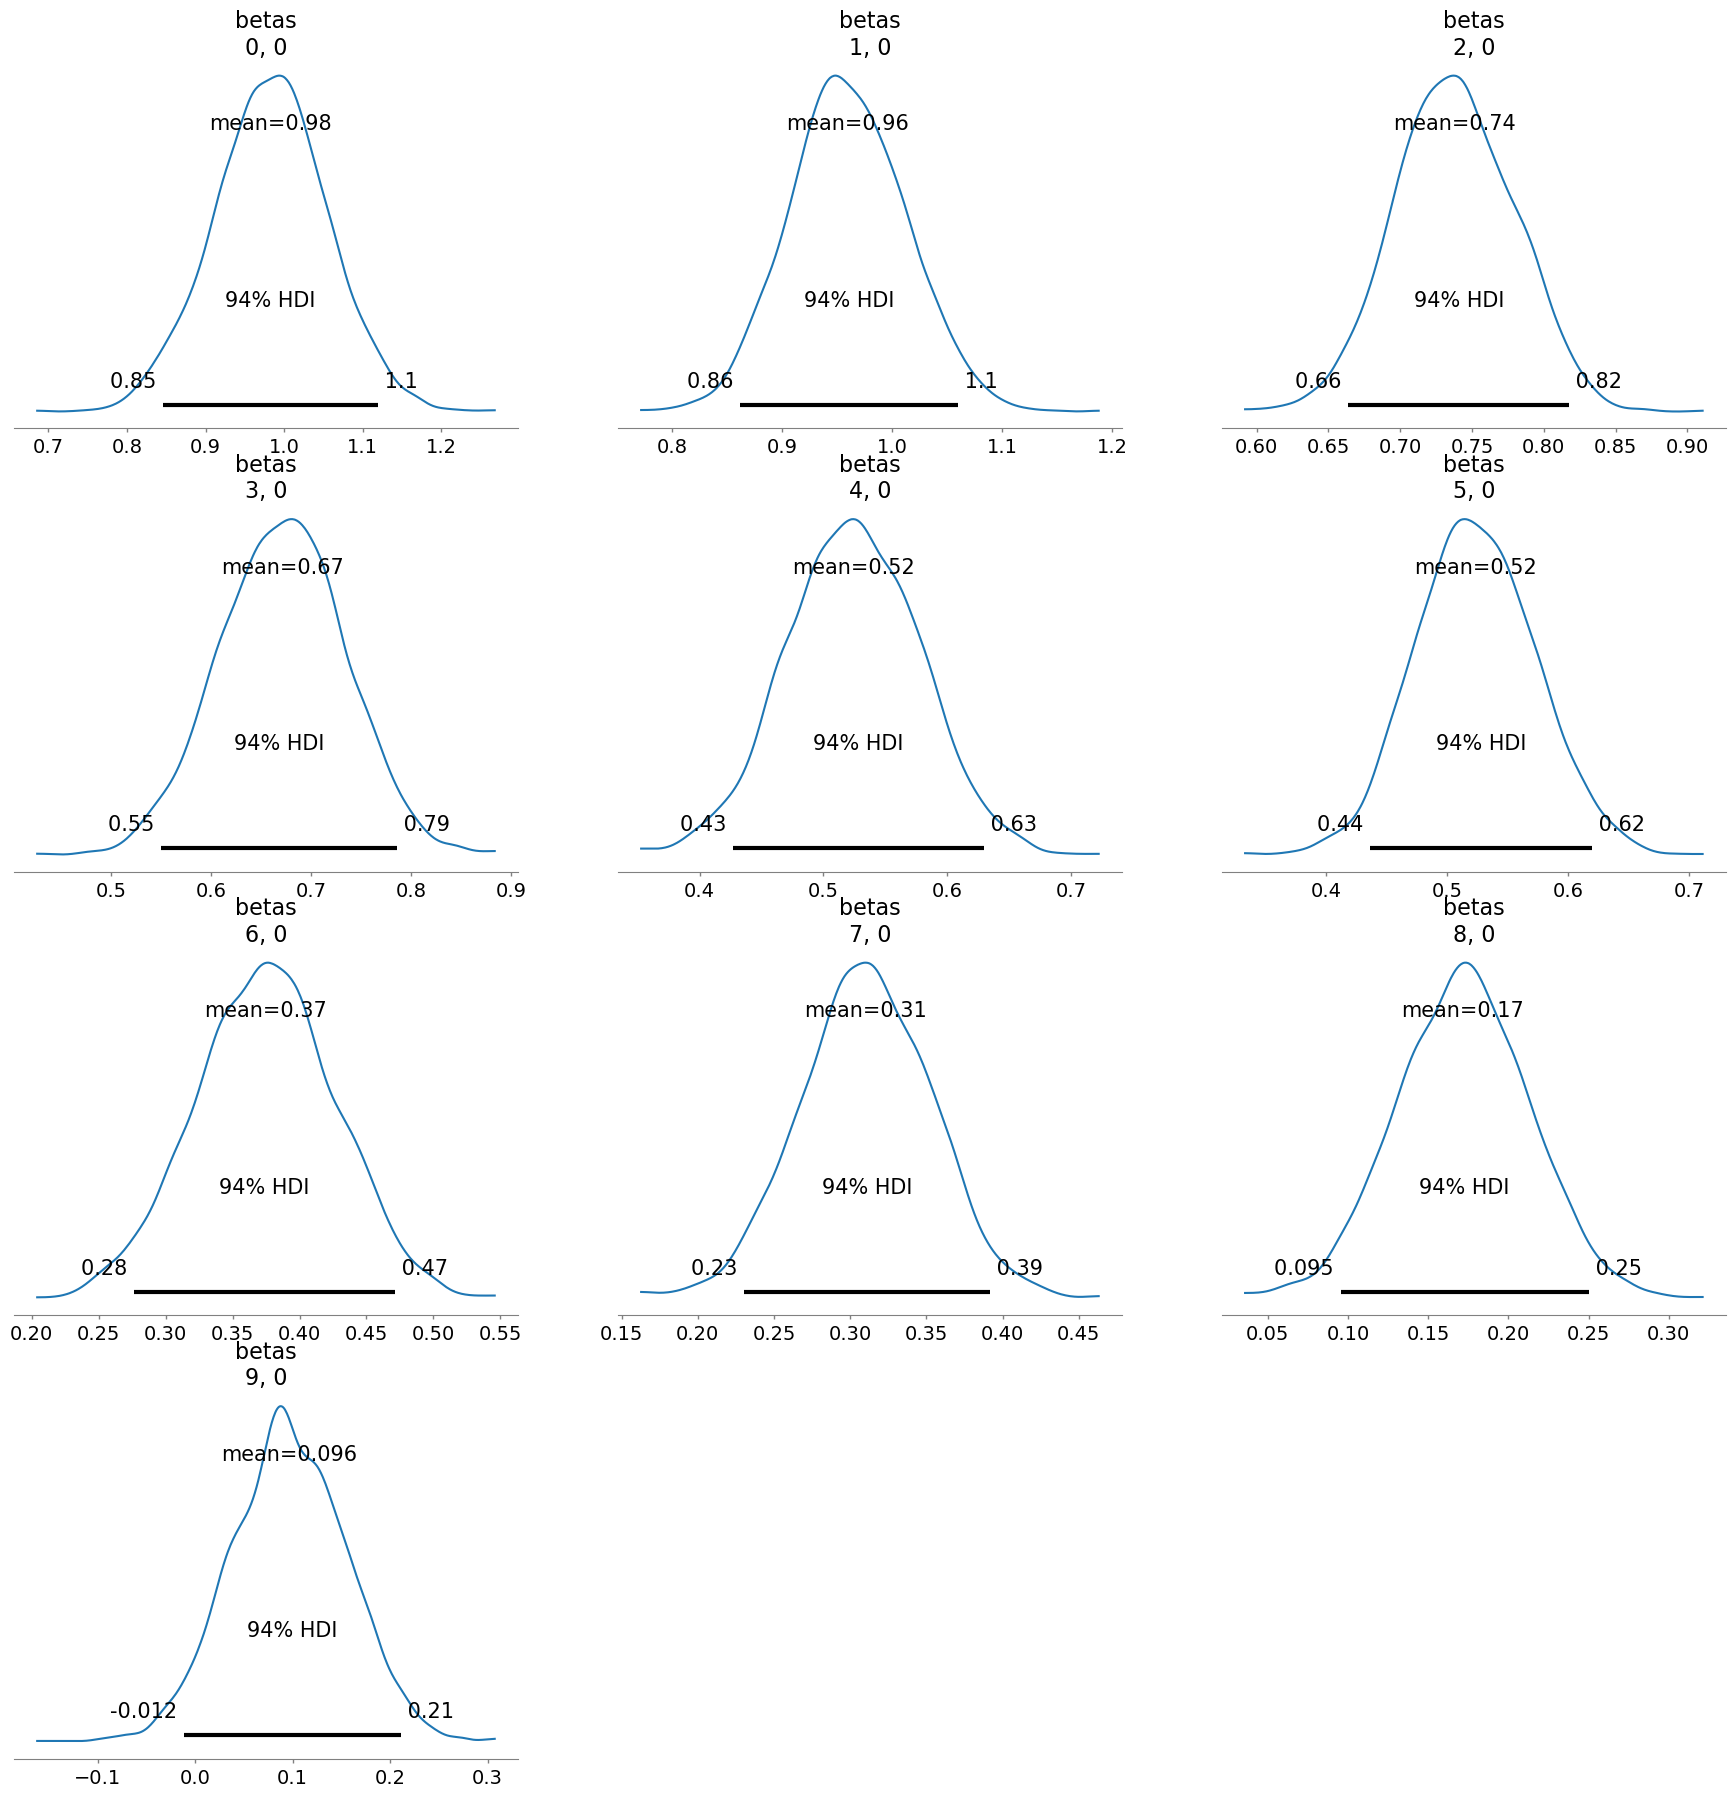

In [14]:
# or this
_ = az.plot_posterior(idata.posterior['betas'], show=True)

In [ ]:
# p2q0 (0.5 points): your code and figures/results will be evaluated visually

# Plot the log of the posterior predicted value of each y versus the log of the observed y


/var/folders/69/4n0cxvc52gl8cvmf7qn06jr00000gn/T/ipykernel_29175/2742633380.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(idata.posterior['lambdas']).mean(axis=1).mean(axis=0),np.log(y),'.')


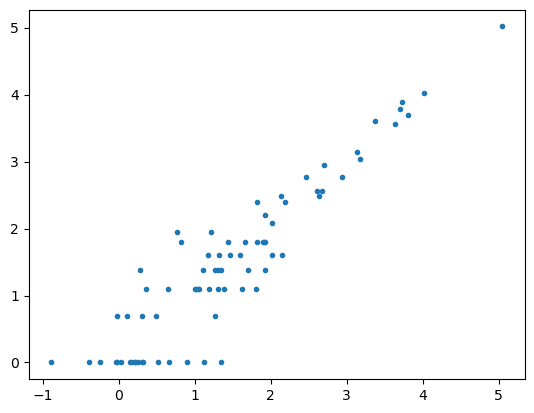

In [25]:
import matplotlib.pyplot as plt
# this is the easiest way, but can also be done without Deterministic
plt.plot(np.log(idata.posterior['lambdas']).mean(axis=1).mean(axis=0),np.log(y),'.')

In [ ]:
# p2q1 (1 point): your code and figures/results will be evaluated visually

# Use a figure to demonstrate agreement of parameter MCMC chains
# Complement the figure with a summary table of relevant diagnostic statistics
# Provide a figure assessing the overall performance of the HMC algorithm


array([<AxesSubplot: title={'center': '94.0% HDI'}>,
       <AxesSubplot: title={'center': 'r_hat'}>], dtype=object)

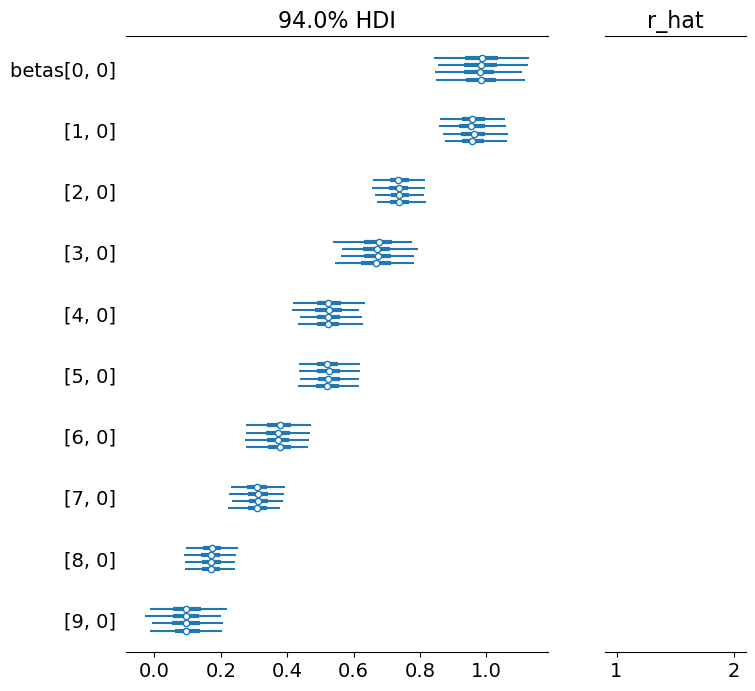

In [15]:
# (1/3) Should have this... including lambdas is less helpful and gets half credit
# Could also have trace plots as long as they have the summary table below
az.plot_forest(idata.posterior['betas'], r_hat=True)

In [16]:
# (1/3) and this... including lambdas is less helpful and gets half credit
az.summary(idata.posterior['betas'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"betas[0, 0]",0.983,0.072,0.846,1.119,0.001,0.001,2602.0,2996.0,1.0
"betas[1, 0]",0.959,0.053,0.862,1.060,0.001,0.001,2787.0,2817.0,1.0
"betas[2, 0]",0.738,0.042,0.664,0.818,0.001,0.000,4179.0,3403.0,1.0
"betas[3, 0]",0.671,0.063,0.550,0.785,0.001,0.001,3883.0,3349.0,1.0
"betas[4, 0]",0.524,0.054,0.427,0.630,0.001,0.001,3657.0,3341.0,1.0
"betas[5, 0]",0.524,0.050,0.436,0.620,0.001,0.001,3072.0,3338.0,1.0
"betas[6, 0]",0.375,0.052,0.277,0.471,0.001,0.001,2926.0,2935.0,1.0
"betas[7, 0]",0.310,0.043,0.230,0.392,0.001,0.001,3026.0,3334.0,1.0
"betas[8, 0]",0.171,0.042,0.095,0.250,0.001,0.001,3442.0,2877.0,1.0
"betas[9, 0]",0.096,0.060,-0.012,0.212,0.001,0.001,4121.0,3278.0,1.0


<AxesSubplot: >

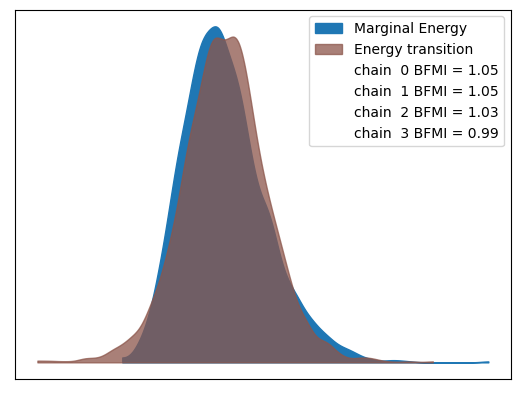

In [26]:
# (1/3) this is the final plot we're looking for
az.plot_energy(idata);

In [ ]:
# p2q2 (1/2 points): your written comments will be reviewed

# Compute `ess_bulk` and `ess_tail` for the model parameters and interpret these values


- provide/write 3 to 4
- short bullet points/summaries
- here...
-

In [27]:
# (1/2) these are already computed from `az.summary(idata.posterior['betas'])`
#
# - (1/8) There are [4] chains with [1000] discarded burn-in/tuning samples each, 
#   and subsequently [4000] total posterior samples
#
# - (1/8) The bulk_ess and tail_ess are generally lower than than [4000],
#   generally ranging from [3000] to about [3300], although
#   there are some lower counts as well as some higher counts as well
#
# - (1/8) The ess is generally lower than the number of HMC draws because
#   the MCMC chains have some positive autocorrelation; and, the less
#   the positive autocorrelation [even including negative correlation], 
#   the higher effective sample sizes
#
# - (1/8) The bulk_ess is larger than the tail_ess for 5/10 coefficients,
#   so there is not a systematic increase in effective sample size 
#   in the bulk of the distribution, as opposed to the tail area

In [50]:
beta_hat, p1q9

(array([[0.99337894],
        [0.95871935],
        [0.7368231 ],
        [0.67169192],
        [0.52562732],
        [0.52255555],
        [0.3746533 ],
        [0.31115609],
        [0.17089869],
        [0.09678262]]),
 array([0.07300949, 0.05280309, 0.04048472, 0.06249884, 0.05347591,
        0.04952407, 0.05136568, 0.04336161, 0.04083168, 0.05969039]))

In [ ]:
# p2q3 (1 point): your code and figures/results will be evaluated visually


In [ ]:
# p2q4 (1/2 points): your written comments will be reviewed

# Summarize the similarity and differences in the posterior diagnostics 
# for the ***logistic regression*** versus the ***Poisson regression***.


- provide/write 2 to 3
- short bullet points/summaries
- here...

In [ ]:
# - The ess_bulk is greatly improved for the logistic regression, 
#   even with negatively correlated MCMC samples resulting in a larger
#   effective sample size than the number of MCMC samples themselves!
#   [The ess_tail sizes are also up, but not as drastically as the ess_bulk samples.]
#
# - The energy plot perhaps(?) looks a bit better for the logistic regression
#   but it's hard to definitively say so...
#
# - The R-hat statistics suggest convergence for both models; so, if anything
#   the logistic regression looks to have slightly better mixing than the 
#   the Poisson regression, but neither seem to be particularly problematic:
#   both had about the same run time.

In [107]:
from pymc import Binomial

with Model() as model:  # model specifications in PyMC3 are wrapped in a with-statement
    
    betas = Normal("betas", mu=0, sigma=1, shape=(10,1))
    means = Deterministic('probas', 1/(1+exp(-X@betas)))
    likelihood = Binomial('likelihood', p=means, n=1, observed=(y>1).astype(int))
    
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 34 seconds.


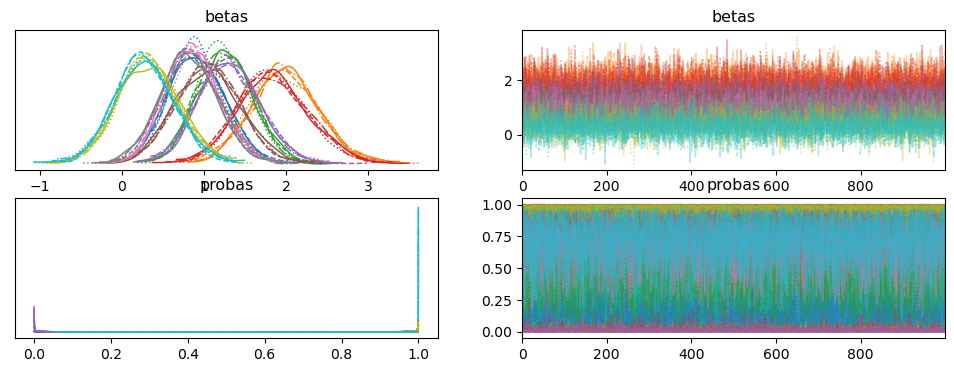

array([[<AxesSubplot: title={'center': 'betas'}>,
        <AxesSubplot: title={'center': 'betas'}>],
       [<AxesSubplot: title={'center': 'probas'}>,
        <AxesSubplot: title={'center': 'probas'}>]], dtype=object)

In [108]:
az.plot_trace(idata, show=True)

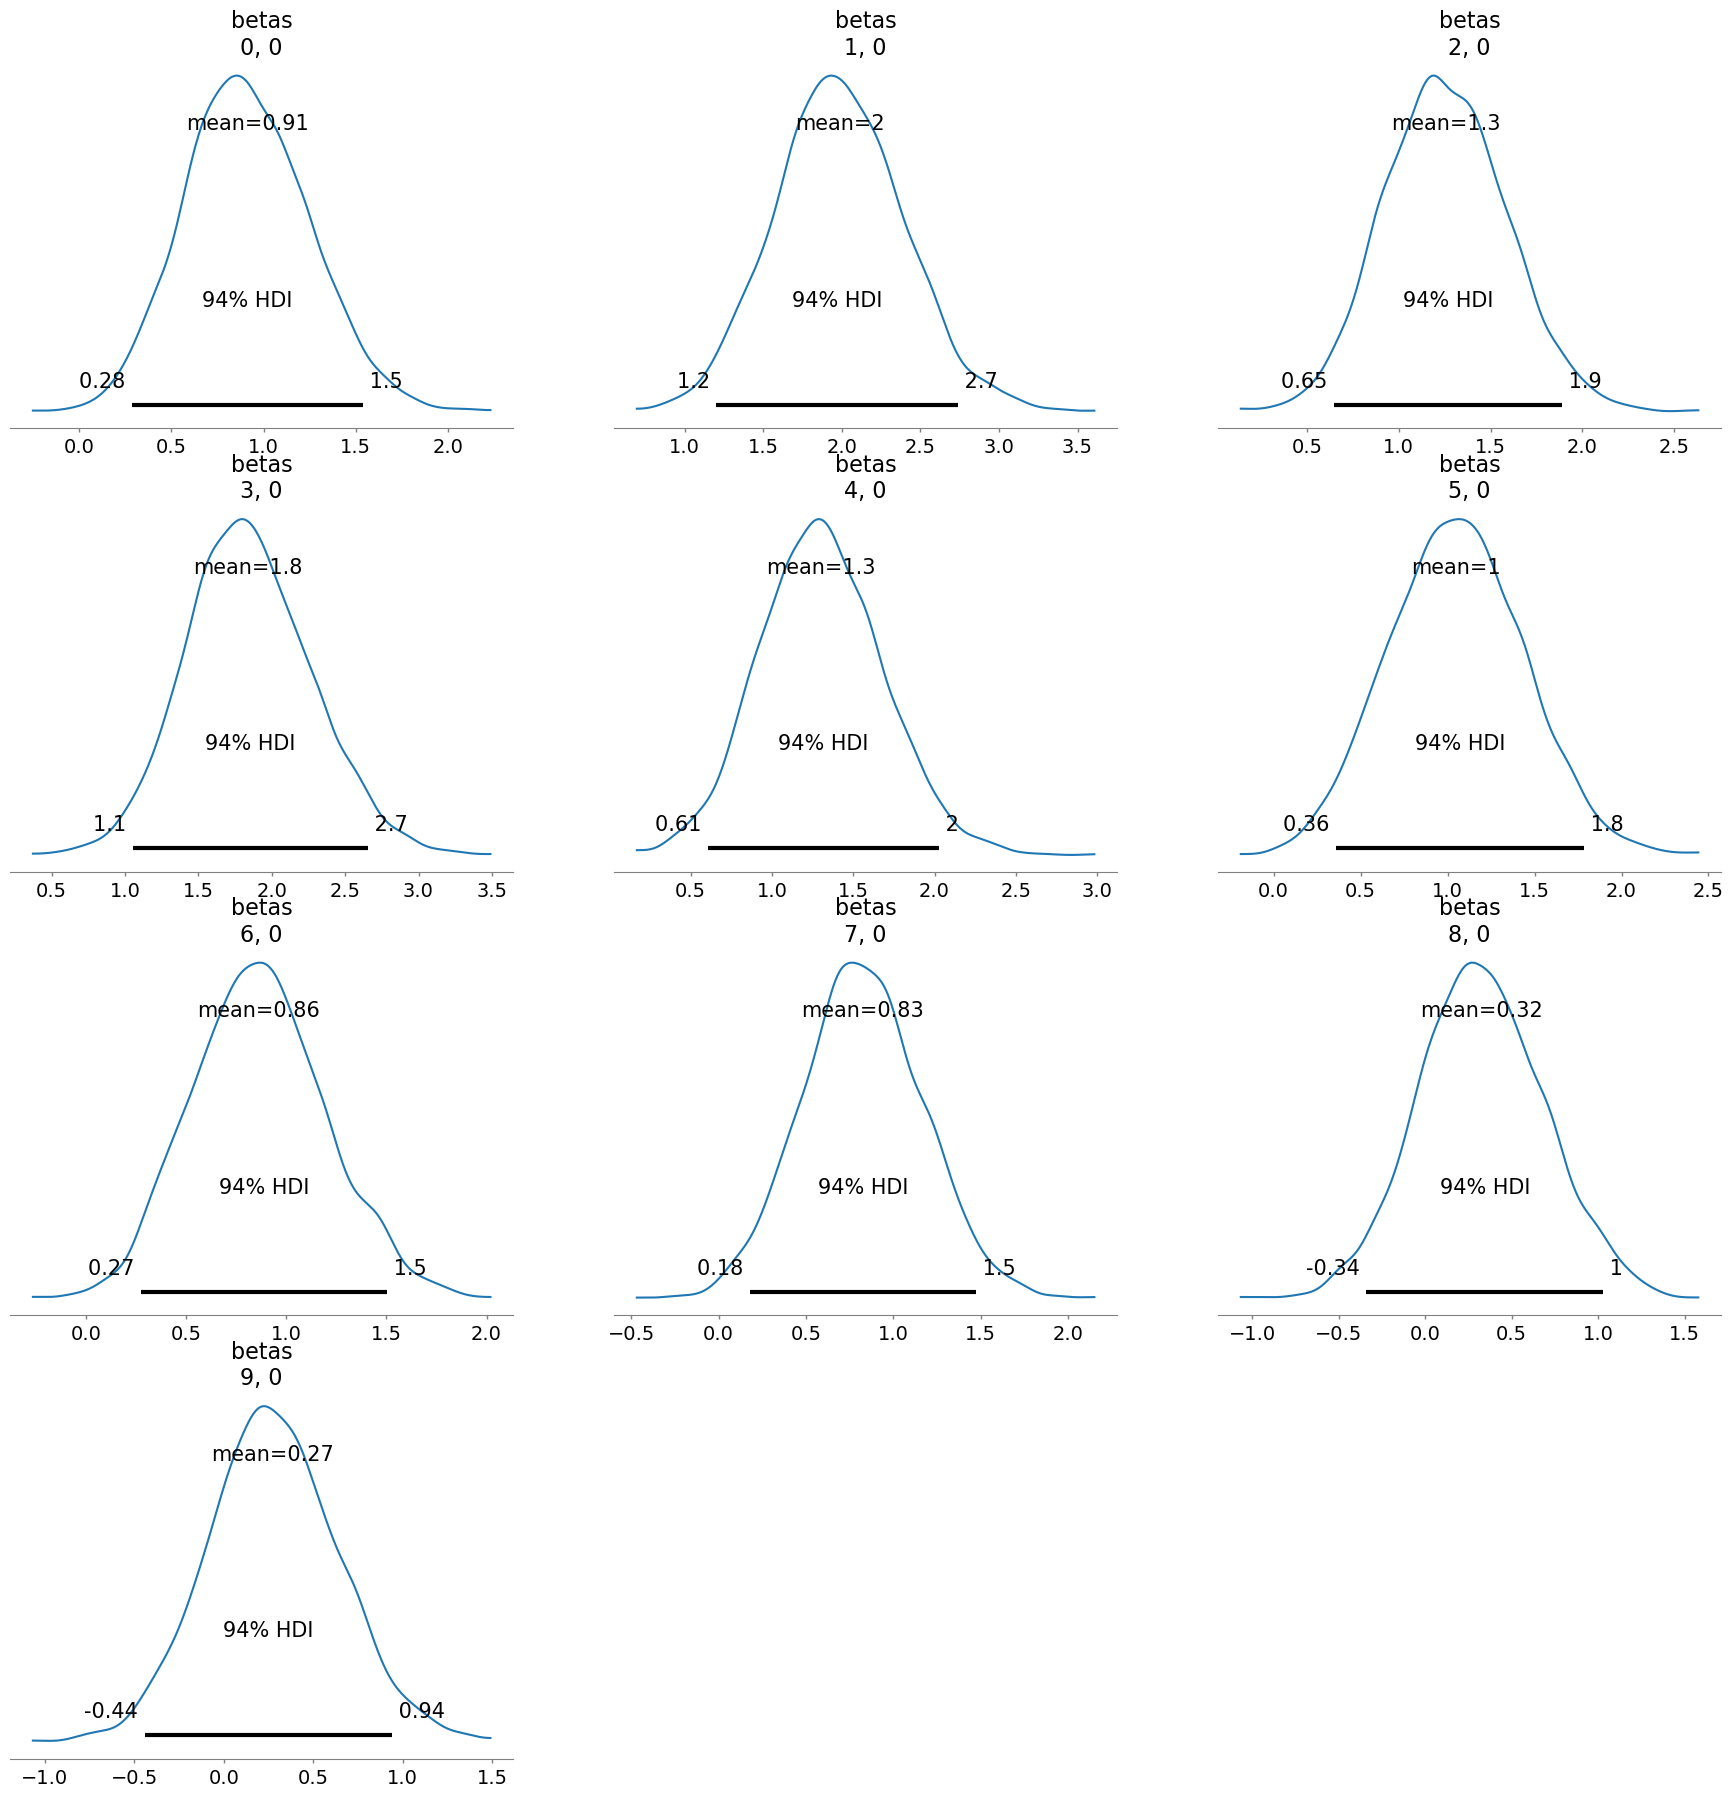

In [109]:
_ = az.plot_posterior(idata.posterior['betas'], show=True)

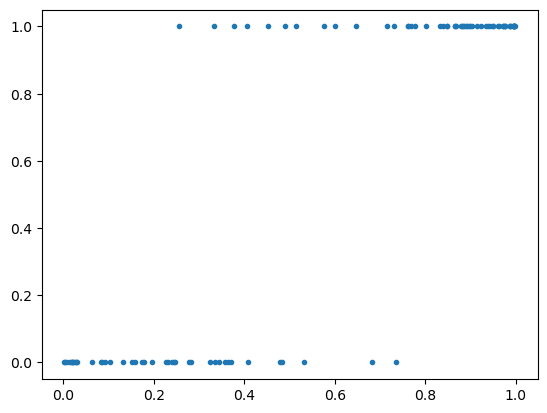

In [110]:
plt.plot(idata.posterior['probas'].mean(axis=1).mean(axis=0), (y>1).astype(int),'.')

array([<AxesSubplot: title={'center': '94.0% HDI'}>,
       <AxesSubplot: title={'center': 'r_hat'}>], dtype=object)

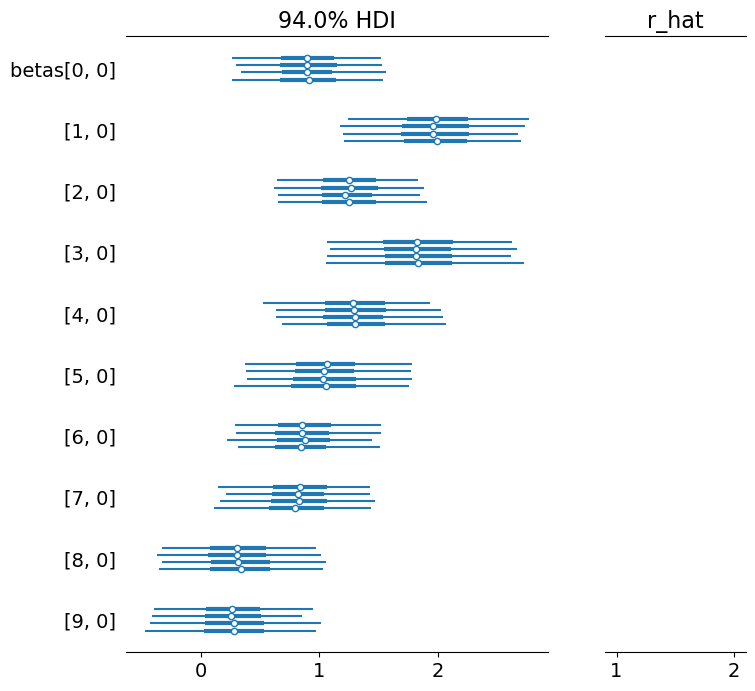

In [111]:
az.plot_forest(idata.posterior['betas'], r_hat=True)

In [112]:
az.summary(idata.posterior['betas'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"betas[0, 0]",0.911,0.338,0.285,1.540,0.005,0.004,4929.0,3528.0,1.0
"betas[1, 0]",1.985,0.411,1.201,2.738,0.006,0.005,4087.0,3531.0,1.0
"betas[2, 0]",1.255,0.333,0.647,1.888,0.005,0.004,4196.0,3406.0,1.0
"betas[3, 0]",1.840,0.429,1.053,2.658,0.006,0.005,4725.0,3317.0,1.0
"betas[4, 0]",1.304,0.377,0.607,2.028,0.006,0.004,4411.0,3618.0,1.0
"betas[5, 0]",1.049,0.385,0.357,1.783,0.005,0.004,5040.0,2893.0,1.0
"betas[6, 0]",0.862,0.333,0.274,1.502,0.005,0.004,4894.0,3390.0,1.0
"betas[7, 0]",0.825,0.346,0.182,1.475,0.005,0.004,5322.0,3113.0,1.0
"betas[8, 0]",0.324,0.365,-0.341,1.031,0.005,0.005,4807.0,3187.0,1.0
"betas[9, 0]",0.274,0.367,-0.443,0.941,0.005,0.004,5043.0,3407.0,1.0


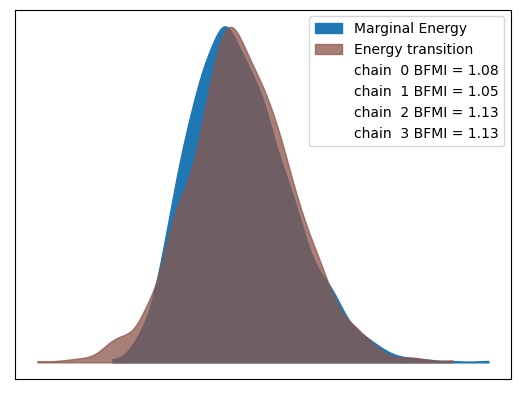

In [113]:
az.plot_energy(idata);